# RestNet 
**ResNet** (Residual Network) is a deep learning architecture introduced in the seminal paper *"Deep Residual Learning for Image Recognition"* by Kaiming He et al., published in 2015. ResNet revolutionized deep learning by addressing the **vanishing gradient problem** and enabling the successful training of very deep neural networks. It has since become a cornerstone for many advanced computer vision and AI tasks.

---

### **Key Features of ResNet:**
1. **Residual Learning:**
   - The key innovation in ResNet is the introduction of *residual blocks*.
   - Instead of learning a direct mapping $H(x)$, the network learns a *residual mapping* $F(x) = H(x) - x$, or equivalently $H(x) = F(x) + x$.
   - This allows the network to focus on learning only the residuals (differences), making it easier to optimize.

   **Residual Block Formula:**

   $$y = F(x, \{W_i\}) + x$$
   where:
   - $F(x, \{W_i\})$ is the learned residual function.
   - $x$ is the input (shortcut connection).
   - $W_i$ are the weights of the layers.

2. **Shortcut Connections (Skip Connections):**
   - These are direct connections that bypass one or more layers.
   - They allow the gradient to flow directly through the network, mitigating the vanishing gradient problem and enabling effective backpropagation.

3. **Depth Without Performance Degradation:**
   - Before ResNet, adding layers to a neural network often led to degraded performance due to vanishing gradients and overfitting.
   - ResNet demonstrated that very deep networks (e.g., 152 layers) could be trained effectively, outperforming shallower ones.

<img src="imgs/ResNet_Block.png" width=600><br/>
Source: <a href="https://arxiv.org/pdf/1512.03385">https://arxiv.org/pdf/1512.03385</a>


---

### **ResNet Architectures:**
Several variants of ResNet exist, with different numbers of layers:
1. **ResNet-18**: 18 layers.
2. **ResNet-34**: 34 layers, comparable to VGG-19 but with fewer parameters.
3. **ResNet-50**: 50 layers with bottleneck blocks.
4. **ResNet-101**: 101 layers.
5. **ResNet-152**: 152 layers, one of the deepest successful architectures in the original paper.

---

### **Applications of ResNet:**
1. **Image Classification:**
   - Widely used in benchmarks like ImageNet.
   - Forms the backbone for many classification tasks.

2. **Object Detection and Segmentation:**
   - Used in frameworks like Mask R-CNN, Faster R-CNN, and YOLO as a feature extractor.

3. **Transfer Learning:**
   - Pretrained ResNet models serve as excellent feature extractors for tasks with limited labeled data.

4. **Beyond Vision:**
   - Adapted for tasks in natural language processing, speech recognition, and other domains requiring deep architectures.

---

### **Advantages of ResNet:**
- Alleviates the vanishing gradient problem.
- Enables training of very deep networks.
- Improves accuracy without adding significant computational cost.
- Modular and adaptable to various deep learning tasks.

---

### **Impact of ResNet:**
ResNet's innovation has influenced many subsequent architectures, such as DenseNet, EfficientNet, and Transformer models. It remains one of the most significant advancements in deep learning, demonstrating how deep architectures can be made more practical and effective.

---
<img src="imgs/ResNet50.png"><br/>
source: <a href="https://medium.com/@nayanchaure601/variants-of-resnet-a-comparative-analysis-63fdc1573b34">https://medium.com/@nayanchaure601/variants-of-resnet-a-comparative-analysis-63fdc1573b34</a>

In [17]:
# Test if CUDA is available or Mac Performance Shaders (MPS) is available.
import torch

device = None
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available.")
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print("MPS backend is available.")
else:
    device = torch.device('cpu')
    print("No GPU available.")
print( f"Device: {device}" )

MPS backend is available.
Device: mps


### torchsummary 
- using torchsummary to print model summary
- if you have no torchsummary installed, you can install it by running the following command:
```shell
pip install torchsummary
```

In [9]:
import torch
from torchsummary import summary
from torchvision import models
from torch import nn
import numpy as np

rn18 = models.resnet18() # Load the model

children_counter = 0
for n, c in rn18.named_children():
    print(f"Child{children_counter:3d} -> Layer name: {n}")
    children_counter += 1
print( rn18._modules ) # Print the model structure

Child  0 -> Layer name: conv1
Child  1 -> Layer name: bn1
Child  2 -> Layer name: relu
Child  3 -> Layer name: maxpool
Child  4 -> Layer name: layer1
Child  5 -> Layer name: layer2
Child  6 -> Layer name: layer3
Child  7 -> Layer name: layer4
Child  8 -> Layer name: avgpool
Child  9 -> Layer name: fc
{'conv1': Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), 'bn1': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 'relu': ReLU(inplace=True), 'maxpool': MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False), 'layer1': Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

### torchinfo 
- using torchinfo to print model summary
- if you have no torchinfo installed, you can install it by running the following command:
```shell
pip install torchinfo
```

In [ ]:
from torchinfo import summary
import torch

device = None
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available.")
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print("MPS backend is available.")
else:
    device = torch.device('cpu')
    print("No GPU available.")
print( f"Device: {device}" )

rn18 = models.resnet18().to(device) # Load the model to the device

summary(rn18, input_size=(1, 3, 224, 224), device=device) # Print the model summary

MPS backend is available.
Device: mps


Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 1000]                 --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

In [18]:
from torch import nn
from torchsummary import summary
from torchvision import models
from torchvision.models import resnet18, ResNet18_Weights

class new_model( nn.Module ):
    def __init__(self, output_layer):
        super().__init__()
        self.output_layer = output_layer
        self.pretrained_model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        self.children_list = []
        for n, c in self.pretrained_model.named_children():
            self.children_list.append(c)
            if n == output_layer:
                print(f"Output layer found: {n}")
                break
        self.net = nn.Sequential( *self.children_list )
        self.pretrained_model = None
    
    def forward(self, x):
        return self.net(x)

device = "cpu"
model = new_model(output_layer='layer1')
model = model.to(device)
summary(model, input_size=(3, 224, 224), device=device) # (3, 224, 224) means 3 channels, 224x224 pixels
            

Output layer found: layer1
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
            

In [17]:
from torch import nn
from torchinfo import summary
from torchvision.models import resnet18, ResNet18_Weights
import torch

class new_model( nn.Module ):
    def __init__(self, output_layer):
        super().__init__()
        self.output_layer = output_layer
        self.pretrained_model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        self.children_list = []
        for n, c in self.pretrained_model.named_children():
            self.children_list.append(c)
            if n == output_layer:
                print(f"Output layer found: {n}")
                break
        self.net = nn.Sequential( *self.children_list )
        self.pretrained_model = None
    
    def forward(self, x):
        return self.net(x)

device = None
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available.")
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print("MPS backend is available.")
else:
    device = torch.device('cpu')
    print("No GPU available.")
print( f"Device: {device}" )

model = new_model(output_layer='layer1')
model = model.to(device)
summary(model, input_size=(1, 3, 224, 224), device=device)
            

MPS backend is available.
Device: mps
Output layer found: layer1


Layer (type:depth-idx)                   Output Shape              Param #
new_model                                [1, 64, 56, 56]           --
├─Sequential: 1-1                        [1, 64, 56, 56]           --
│    └─Conv2d: 2-1                       [1, 64, 112, 112]         9,408
│    └─BatchNorm2d: 2-2                  [1, 64, 112, 112]         128
│    └─ReLU: 2-3                         [1, 64, 112, 112]         --
│    └─MaxPool2d: 2-4                    [1, 64, 56, 56]           --
│    └─Sequential: 2-5                   [1, 64, 56, 56]           --
│    │    └─BasicBlock: 3-1              [1, 64, 56, 56]           73,984
│    │    └─BasicBlock: 3-2              [1, 64, 56, 56]           73,984
Total params: 157,504
Trainable params: 157,504
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 580.44
Input size (MB): 0.60
Forward/backward pass size (MB): 25.69
Params size (MB): 0.63
Estimated Total Size (MB): 26.92

MPS backend is available.
Device: mps
Output layer found: layer1


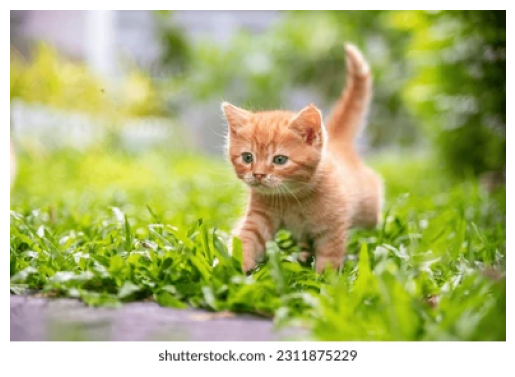

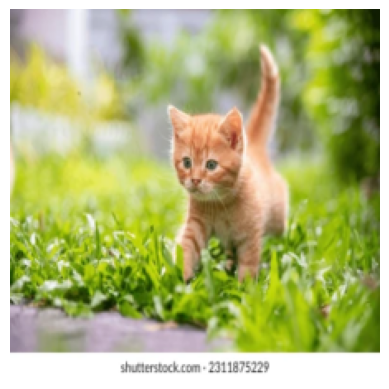

torch.Size([1, 64, 56, 56])

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch
from torch import nn
from torchvision.models import resnet18, ResNet18_Weights
from torchsummary import summary

class my_model( nn.Module ):
    def __init__(self, output_layer):
        super().__init__()
        self.output_layer = output_layer
        self.pretrained_model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        self.children_list = []
        for n, c in self.pretrained_model.named_children():
            self.children_list.append(c)
            if n == output_layer:
                print(f"Output layer found: {n}")
                break
        self.net = nn.Sequential( *self.children_list )
        self.pretrained_model = None
    
    def forward(self, x):
        return self.net(x)

device = None
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available.")
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print("MPS backend is available.")
else:
    device = torch.device('cpu')
    print("No GPU available.")
print( f"Device: {device}" )

model = my_model(output_layer='layer1')
model = model.to(device)

img = Image.open("../imgs/cat_01.png")
plt.imshow(img)
plt.axis('off')
plt.show()

resize_img = transforms.Resize((224, 224))
resized_img = resize_img(img)
plt.imshow(resized_img)
plt.axis('off')
plt.show()

to_tensor = transforms.ToTensor()
img_tensor = to_tensor(resized_img).to(device)
reshaped_img_tensor = img_tensor.reshape(1, *img_tensor.shape)
out = model( reshaped_img_tensor )
out.shape

MPS backend is available.
Device: mps
Output layer found: layer1


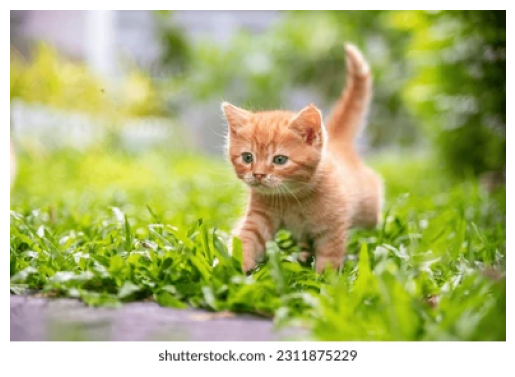

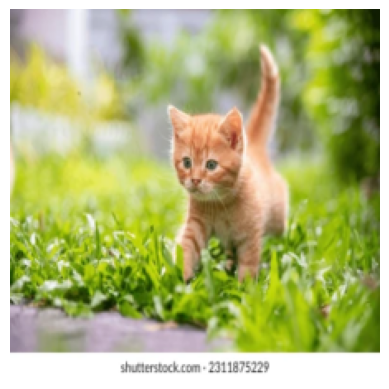

torch.Size([1, 64, 56, 56])


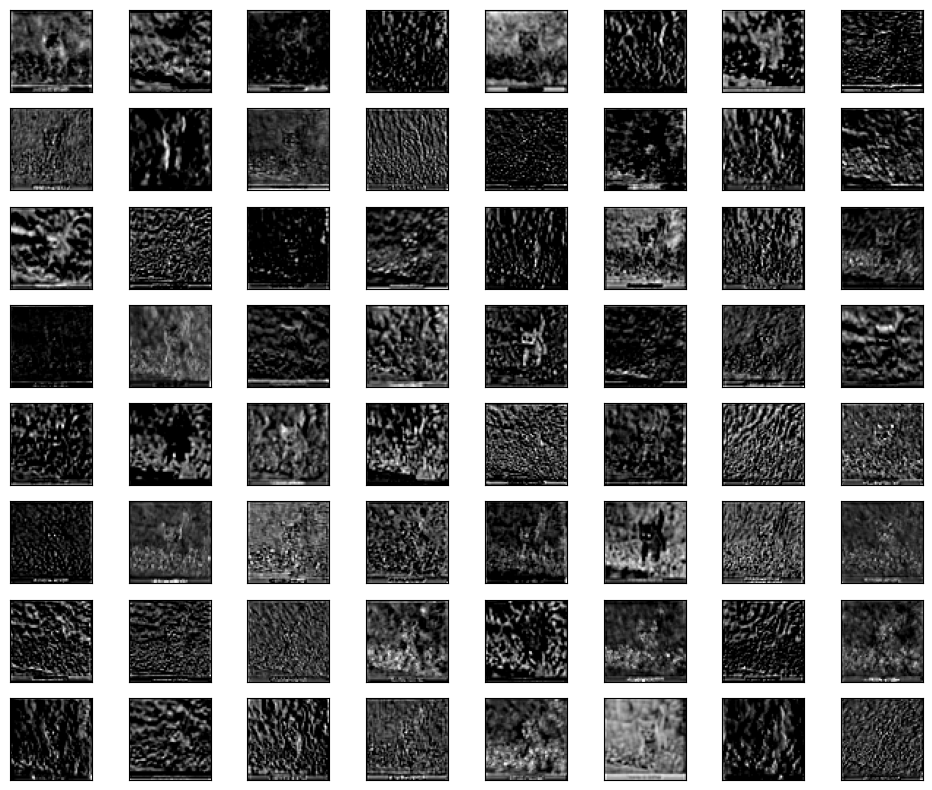

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.models import resnet18, ResNet18_Weights
import torch
from torchsummary import summary

class my_model( nn.Module ):
    def __init__(self, output_layer):
        super().__init__()
        self.output_layer = output_layer
        self.pretrained_model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        self.children_list = []
        for n, c in self.pretrained_model.named_children():
            self.children_list.append(c)
            if n == output_layer:
                print(f"Output layer found: {n}")
                break
        self.net = nn.Sequential( *self.children_list )
        self.pretrained_model = None
    
    def forward(self, x):
        return self.net(x)

def show_grid( out ):
    square = 8
    plt.figure( figsize=(12, 10))
    for fmap in out.cpu().detach().numpy():
        ix = 1
        for _ in range( square ):
            for _ in range( square ):
                ax = plt.subplot( square, square, ix )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(fmap[ix-1, :, :], cmap='gray')
                ix += 1
        plt.show()
        
device = None
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available.")
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print("MPS backend is available.")
else:
    device = torch.device('cpu')
    print("No GPU available.")
print( f"Device: {device}" )

model = my_model(output_layer='layer1')
model = model.to(device)

img = Image.open("../imgs/cat_01.png")
plt.imshow(img)
plt.axis('off')
plt.show()

resize_img = transforms.Resize((224, 224))
resized_img = resize_img(img)
plt.imshow(resized_img)
plt.axis('off')
plt.show()

to_tensor = transforms.ToTensor()
img_tensor = to_tensor(resized_img).to(device)
reshaped_img_tensor = img_tensor.reshape(1, *img_tensor.shape)
out = model( reshaped_img_tensor )
print( out.shape )
show_grid( out )

MPS backend is available.
Device: mps
Output layer found: layer1


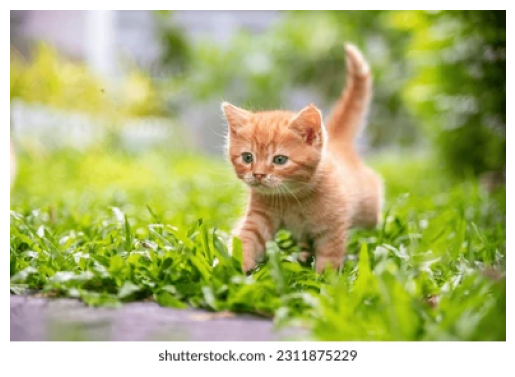

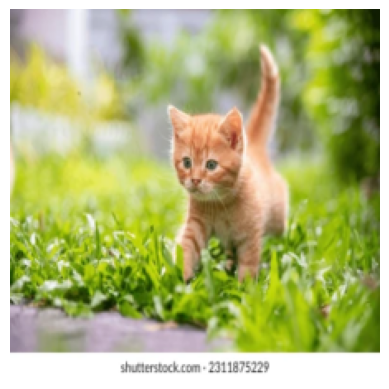

torch.Size([1, 64, 56, 56])


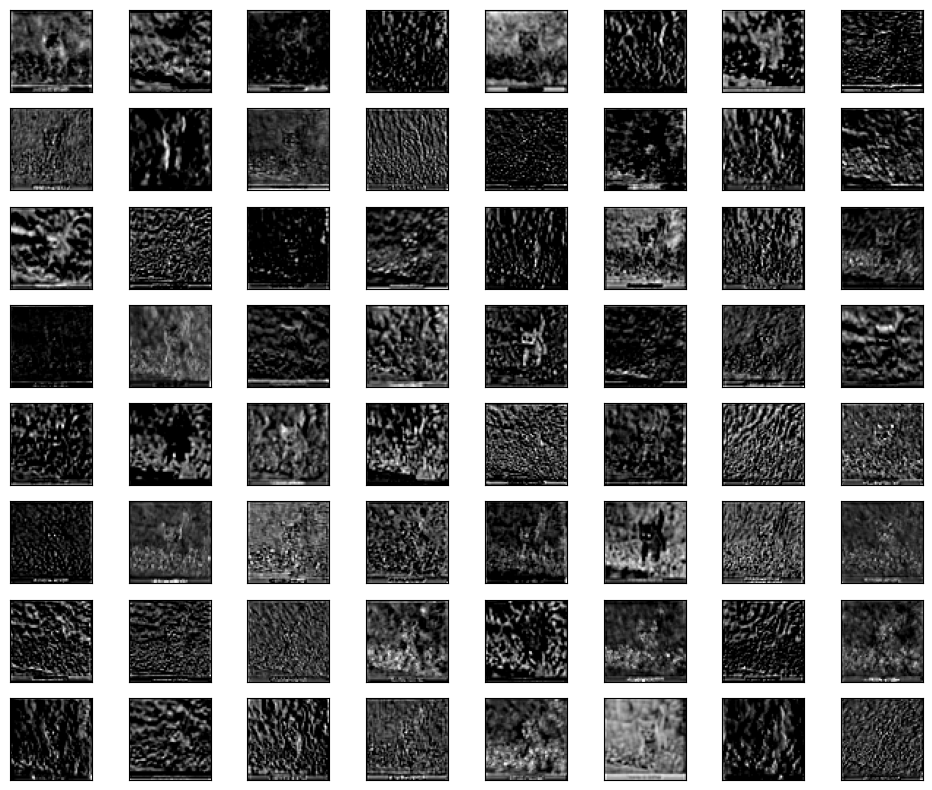

Output layer found: layer2
torch.Size([1, 128, 28, 28])


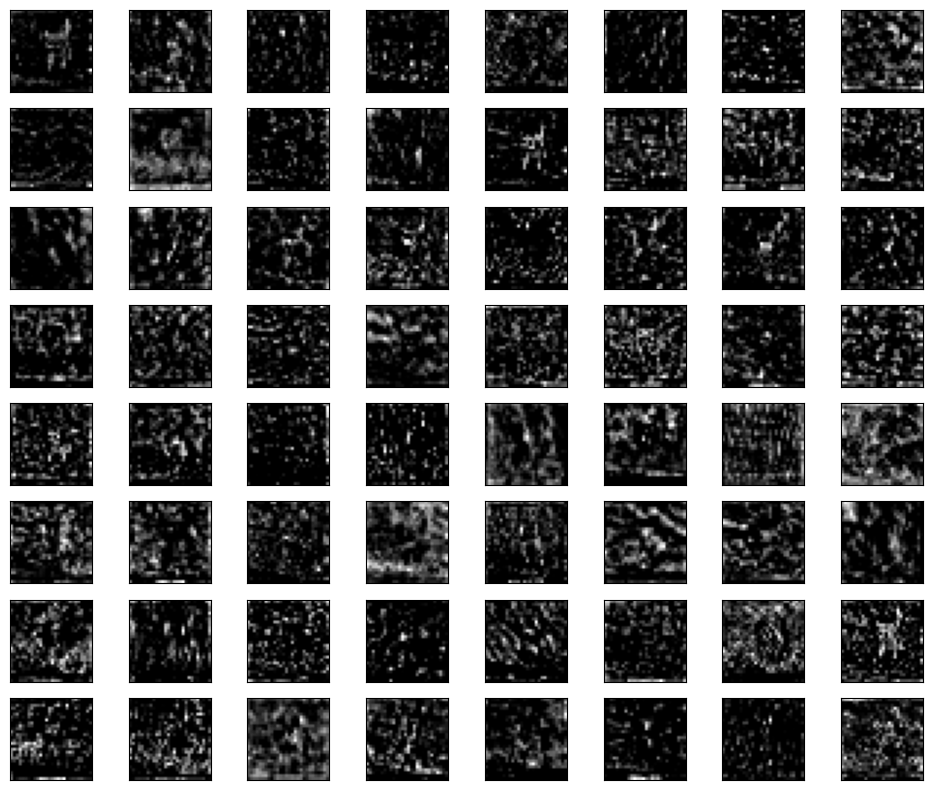

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.models import resnet18, ResNet18_Weights
from torchsummary import summary

class my_model( nn.Module ):
    def __init__(self, output_layer):
        super().__init__()
        self.output_layer = output_layer
        self.pretrained_model = models.resnet18(weights=True)
        self.children_list = []
        for n, c in self.pretrained_model.named_children():
            self.children_list.append(c)
            if n == output_layer:
                print(f"Output layer found: {n}")
                break
        self.net = nn.Sequential( *self.children_list )
        self.pretrained_model = None
    
    def forward(self, x):
        return self.net(x)

def show_grid( out ):
    square = 8
    plt.figure( figsize=(12, 10))
    for fmap in out.cpu().detach().numpy():
        ix = 1
        for _ in range( square ):
            for _ in range( square ):
                ax = plt.subplot( square, square, ix )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(fmap[ix-1, :, :], cmap='gray')
                ix += 1
        plt.show()
        
device = None
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available.")
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print("MPS backend is available.")
else:
    device = torch.device('cpu')
    print("No GPU available.")
print( f"Device: {device}" )

model = my_model(output_layer='layer1')
model = model.to(device)
# summary(model, input_size=(3, 224, 224), device=device)

img = Image.open("../imgs/cat_01.png")
plt.imshow(img)
plt.axis('off')
plt.show()

resize_img = transforms.Resize((224, 224))
resized_img = resize_img(img)
plt.imshow(resized_img)
plt.axis('off')
plt.show()

to_tensor = transforms.ToTensor()
img_tensor = to_tensor(resized_img).to(device)
reshaped_img_tensor = img_tensor.reshape(1, *img_tensor.shape)
out = model( reshaped_img_tensor )
print( out.shape )
show_grid( out )

model = my_model(output_layer='layer2').to(device)
out = model( reshaped_img_tensor )
print( out.shape )
show_grid( out )

MPS backend is available.
Device: mps
Output layer found: layer1


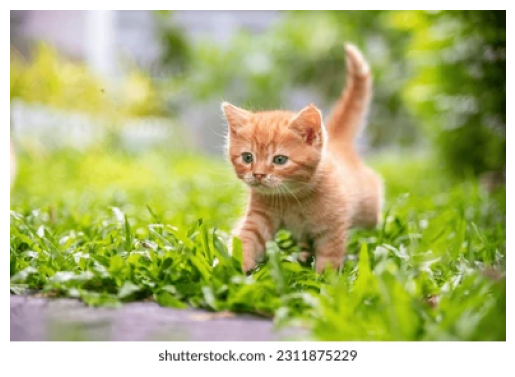

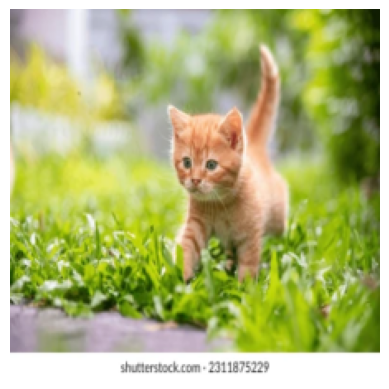

torch.Size([1, 64, 56, 56])


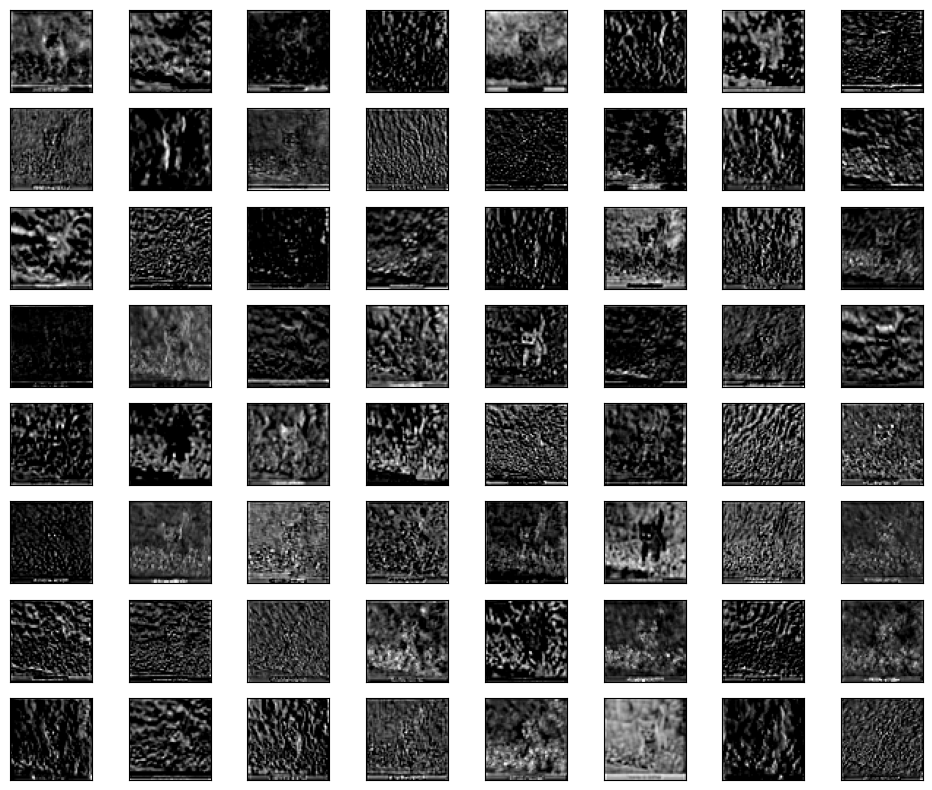

Output layer found: layer2
torch.Size([1, 128, 28, 28])


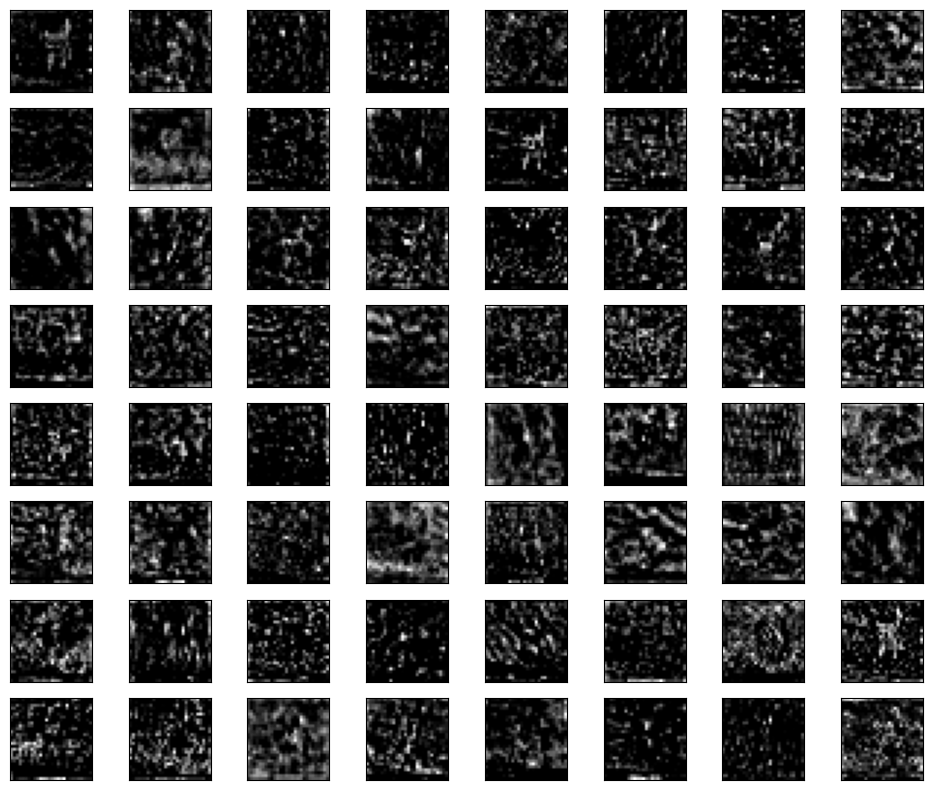

Output layer found: layer3
torch.Size([1, 256, 14, 14])


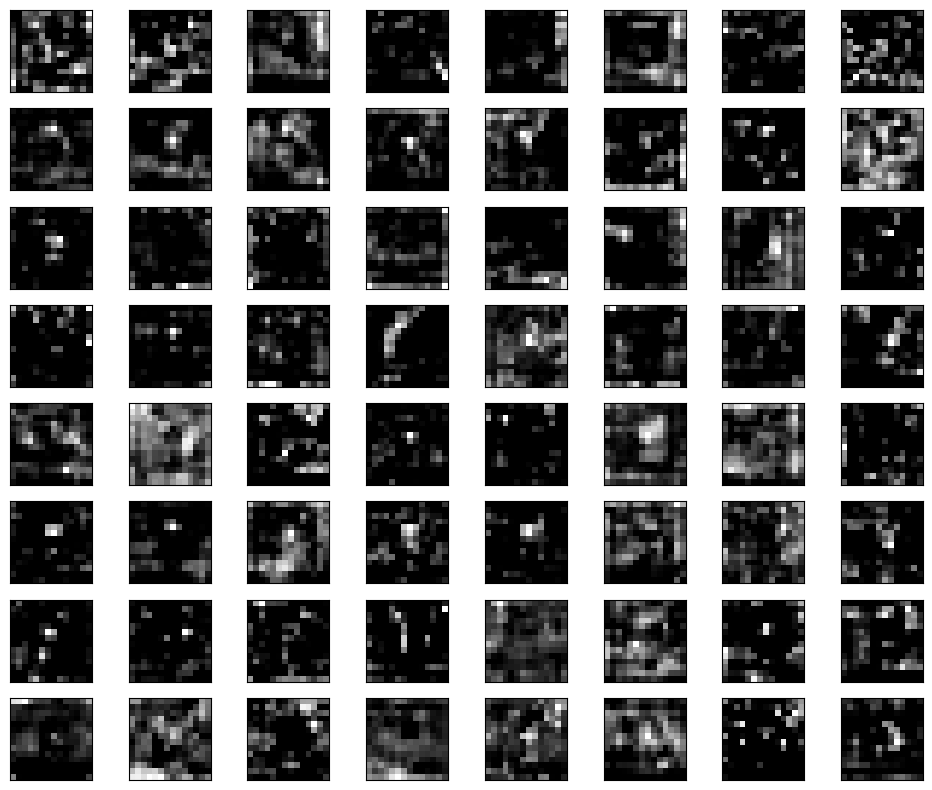

In [64]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchsummary import summary

class my_model( nn.Module ):
    def __init__(self, output_layer):
        super().__init__()
        self.output_layer = output_layer
        self.pretrained_model = models.resnet18(weights=True)
        self.children_list = []
        for n, c in self.pretrained_model.named_children():
            self.children_list.append(c)
            if n == output_layer:
                print(f"Output layer found: {n}")
                break
        self.net = nn.Sequential( *self.children_list )
        self.pretrained_model = None
    
    def forward(self, x):
        return self.net(x)

def show_grid( out ):
    square = 8
    plt.figure( figsize=(12, 10))
    for fmap in out.cpu().detach().numpy():
        ix = 1
        for _ in range( square ):
            for _ in range( square ):
                ax = plt.subplot( square, square, ix )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(fmap[ix-1, :, :], cmap='gray')
                ix += 1
        plt.show()
        
device = None
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available.")
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print("MPS backend is available.")
else:
    device = torch.device('cpu')
    print("No GPU available.")
print( f"Device: {device}" )

model = my_model(output_layer='layer1')
model = model.to(device)

img = Image.open("../imgs/cat_01.png")
plt.imshow(img)
plt.axis('off')
plt.show()

resize_img = transforms.Resize((224, 224))
resized_img = resize_img(img)
plt.imshow(resized_img)
plt.axis('off')
plt.show()

to_tensor = transforms.ToTensor()
img_tensor = to_tensor(resized_img).to(device)
reshaped_img_tensor = img_tensor.reshape(1, *img_tensor.shape)
out = model( reshaped_img_tensor )
print( out.shape )
show_grid( out )

model = my_model(output_layer='layer2').to(device)
out = model( reshaped_img_tensor )
print( out.shape )
show_grid( out )

model = my_model(output_layer='layer3').to(device)
out = model( reshaped_img_tensor )
print( out.shape )
show_grid( out )

MPS backend is available.
Device: mps
Output layer found: layer1


/opt/homebrew/Caskroom/miniconda/base/envs/113_Python/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


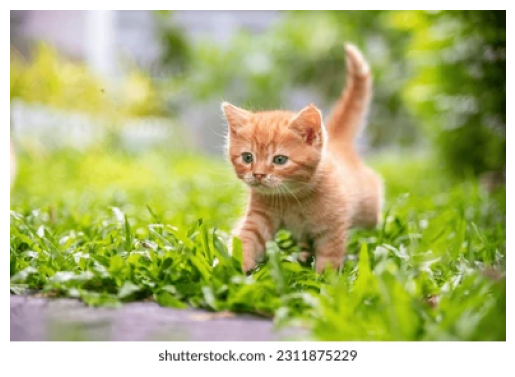

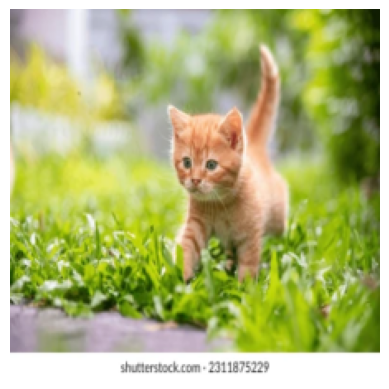

torch.Size([1, 64, 56, 56])


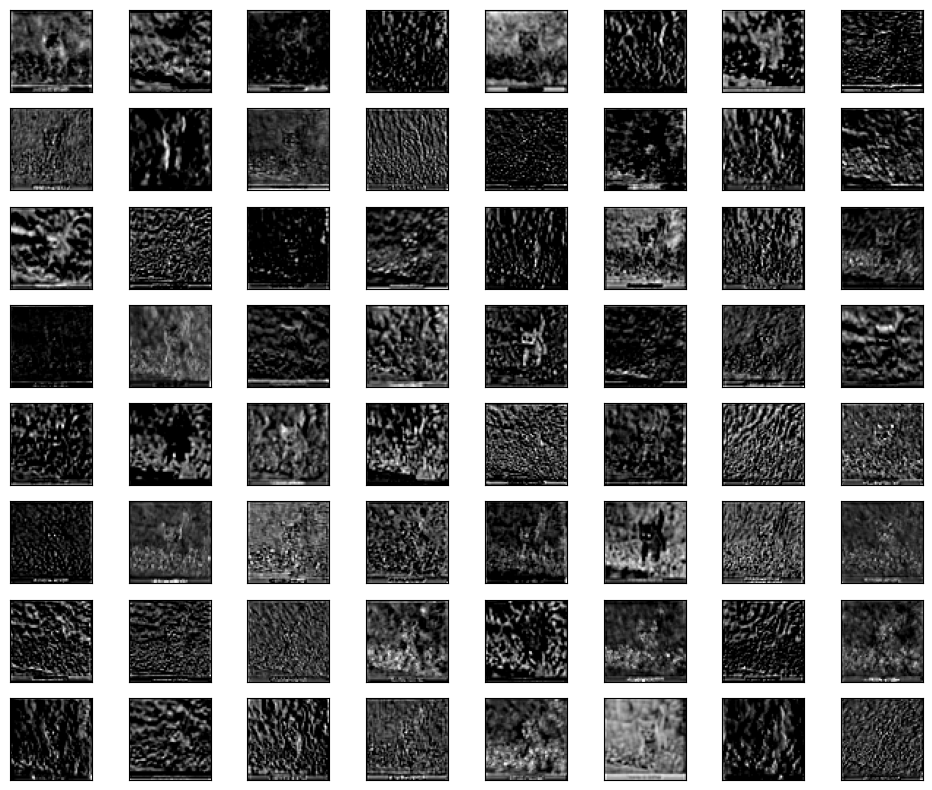

Output layer found: layer2
torch.Size([1, 128, 28, 28])


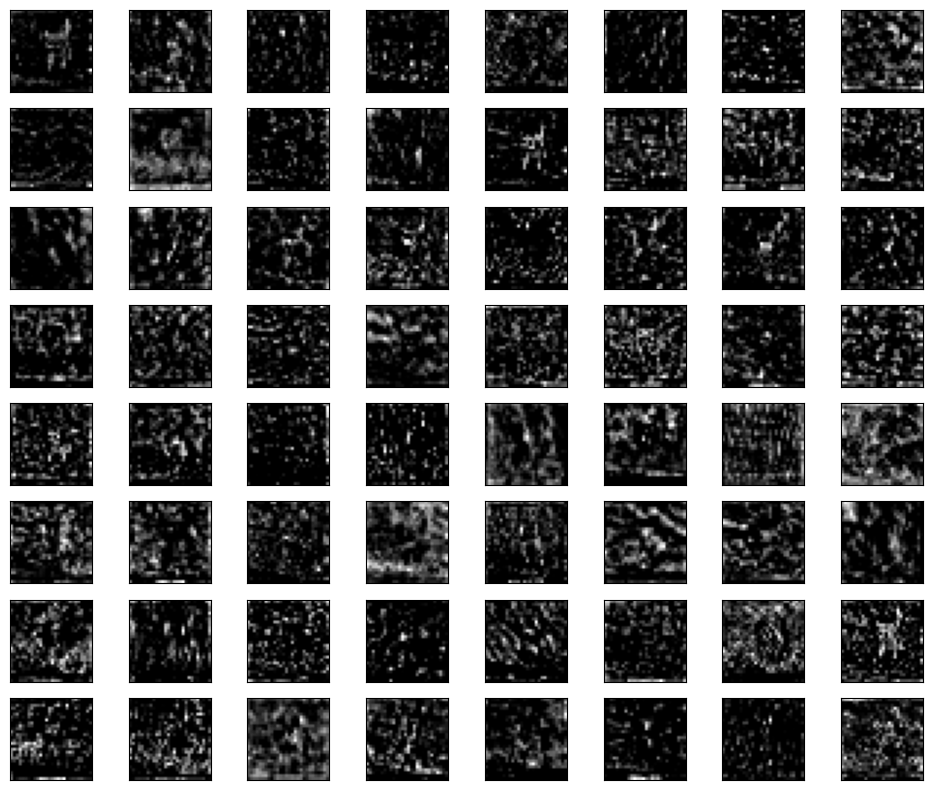

Output layer found: layer3
torch.Size([1, 256, 14, 14])


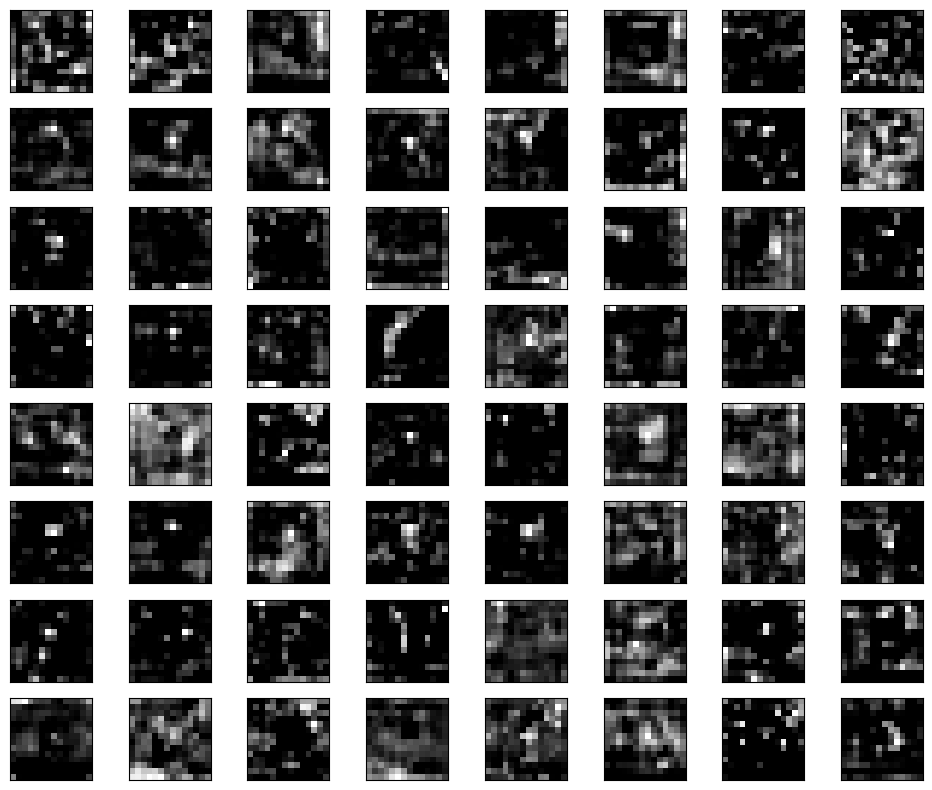

Output layer found: layer4
torch.Size([1, 512, 7, 7])


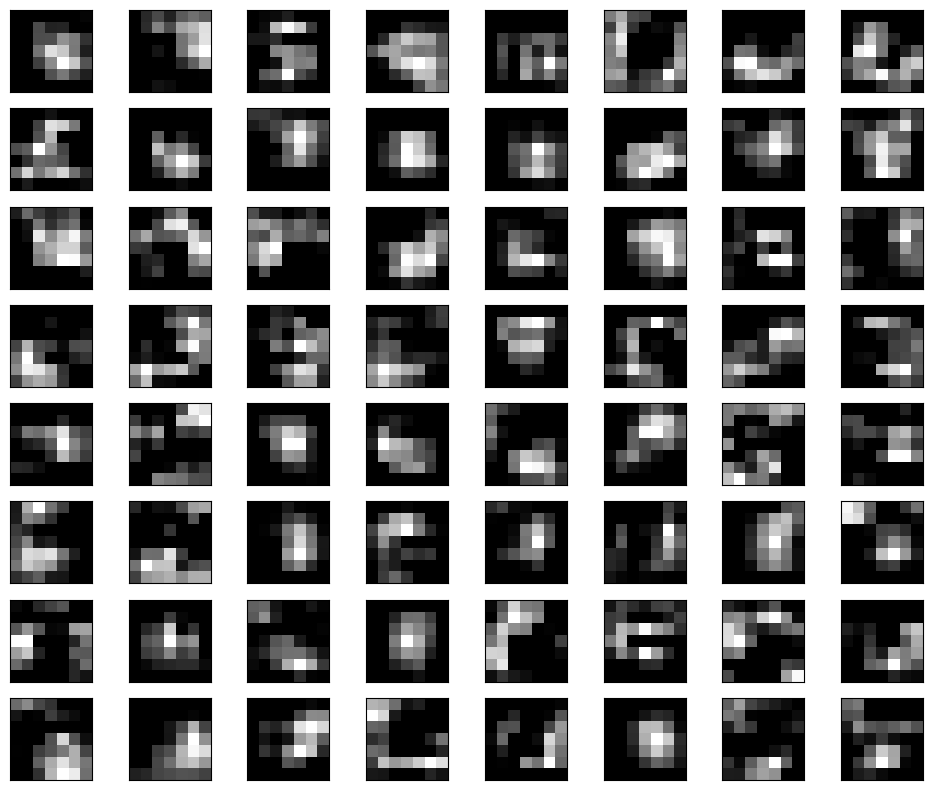

In [65]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchsummary import summary

class my_model( nn.Module ):
    def __init__(self, output_layer):
        super().__init__()
        self.output_layer = output_layer
        self.pretrained_model = models.resnet18(weights=True)
        self.children_list = []
        for n, c in self.pretrained_model.named_children():
            self.children_list.append(c)
            if n == output_layer:
                print(f"Output layer found: {n}")
                break
        self.net = nn.Sequential( *self.children_list )
        self.pretrained_model = None
    
    def forward(self, x):
        return self.net(x)

def show_grid( out ):
    square = 8
    plt.figure( figsize=(12, 10))
    for fmap in out.cpu().detach().numpy():
        ix = 1
        for _ in range( square ):
            for _ in range( square ):
                ax = plt.subplot( square, square, ix )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(fmap[ix-1, :, :], cmap='gray')
                ix += 1
        plt.show()
        
device = None
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available.")
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print("MPS backend is available.")
else:
    device = torch.device('cpu')
    print("No GPU available.")
print( f"Device: {device}" )

model = my_model(output_layer='layer1')
model = model.to(device)

img = Image.open("../imgs/cat_01.png")
plt.imshow(img)
plt.axis('off')
plt.show()

resize_img = transforms.Resize((224, 224))
resized_img = resize_img(img)
plt.imshow(resized_img)
plt.axis('off')
plt.show()

to_tensor = transforms.ToTensor()
img_tensor = to_tensor(resized_img).to(device)
reshaped_img_tensor = img_tensor.reshape(1, *img_tensor.shape)
out = model( reshaped_img_tensor )
print( out.shape )
show_grid( out )

model = my_model(output_layer='layer2').to(device)
out = model( reshaped_img_tensor )
print( out.shape )
show_grid( out )

model = my_model(output_layer='layer3').to(device)
out = model( reshaped_img_tensor )
print( out.shape )
show_grid( out )

model = my_model(output_layer='layer4').to(device)
out = model( reshaped_img_tensor )
print( out.shape )
show_grid( out )